In [ ]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


11490434/11490434 [==============================] - 2s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

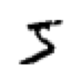

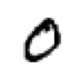

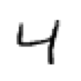

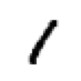

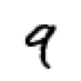

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(5):    
    plt.figure(figsize=(0.8 , 0.8))
    plt.imshow(X_train[i], cmap='gray_r')
    plt.axis('off')
    plt.show()

In [ ]:
# 建立簡單的線性執行模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256 個輸出變數
model.add(Dense(units=64, input_dim=784, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=48, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=32, kernel_initializer='normal', activation='relu')) # Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 dense_2 (Dense)             (None, 32)                1568      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 55,258
Trainable params: 55,258
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_test[:3],\
np_utils.to_categorical(y_test)[:3]

(array([7, 2, 1], dtype=uint8),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

In [ ]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255 # 標準化就是0-1之間數字
x_Test_norm = X_test_2D/255

# 進行訓練, 訓練過程會存在 train_history 變數中 callback
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=10, 
                          batch_size=800, 
                          verbose=1
                          )  


Epoch 1/10
60/60 [==============================] - 6s 10ms/step - loss: 1.7420 - accuracy: 0.5221 - val_loss: 0.7491 - val_accuracy: 0.7818
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 0.5435 - accuracy: 0.8391 - val_loss: 0.4015 - val_accuracy: 0.8823
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3888 - accuracy: 0.8870 - val_loss: 0.3299 - val_accuracy: 0.9063
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3320 - accuracy: 0.9034 - val_loss: 0.2919 - val_accuracy: 0.9143
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2936 - accuracy: 0.9161 - val_loss: 0.2634 - val_accuracy: 0.9234
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2625 - accuracy: 0.9243 - val_loss: 0.2449 - val_accuracy: 0.9263
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2384 - accuracy: 0.9305 - val_loss: 0.2231 - val_accuracy: 0.9350
Epoch 8/10
60/60 [=

In [ ]:
train_history.history.keys() # callback

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

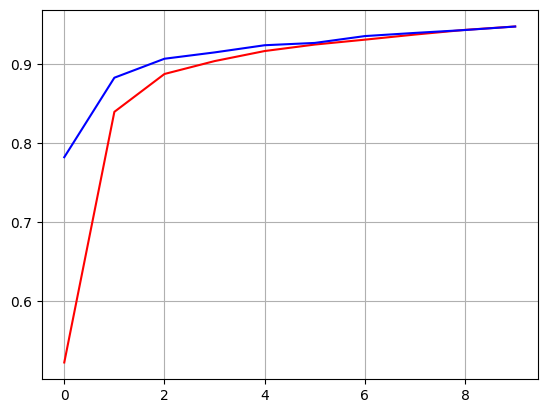

In [ ]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

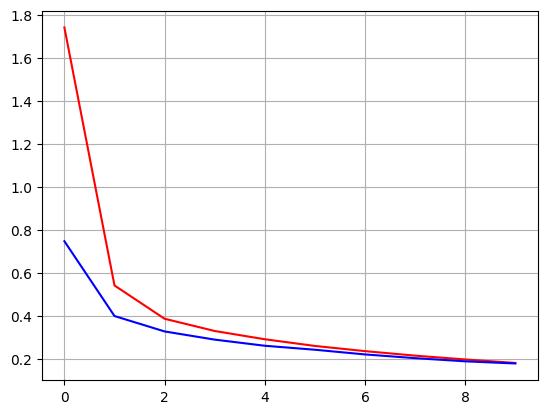

In [ ]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  



1875/1875 [==============================] - 5s 3ms/step - loss: 0.1740 - accuracy: 0.9506
	[Info] Accuracy of training data = 95.1%
313/313 [==============================] - 1s 3ms/step - loss: 0.1868 - accuracy: 0.9458
	[Info] Accuracy of testing data = 94.6%


In [ ]:
# 預測(prediction)
X = x_Test_norm
print(X.shape)
predictions = np.argmax(model.predict(X), axis=1) # np.argmax 找出最佳的數字softmax
model.predict(X)[:3]

(10000, 784)
313/313 [==============================] - 1s 2ms/step


array([[2.90938973e-04, 3.82568857e-08, 5.11753897e-04, 1.36596919e-03,
        3.33452164e-08, 7.14825035e-07, 8.41257786e-10, 9.96206760e-01,
        3.70738526e-05, 1.58671511e-03],
       [5.01073555e-06, 6.55412732e-05, 9.99079347e-01, 8.12807411e-04,
        2.28706724e-12, 3.22667915e-06, 1.26730456e-05, 1.58336260e-08,
        2.13458170e-05, 6.84141771e-11],
       [9.99846634e-06, 9.85219479e-01, 1.55944494e-03, 1.98670197e-03,
        7.11190572e-04, 1.20160745e-04, 1.05620571e-03, 1.72665529e-03,
        7.26779550e-03, 3.42372718e-04]], dtype=float32)

In [ ]:
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
# 模型結構存檔
from keras.models import model_from_json
json_string = model.to_json()
with open("model.config", "w") as text_file:
    text_file.write(json_string)

    
# 模型訓練結果存檔
model.save_weights("model.weight")

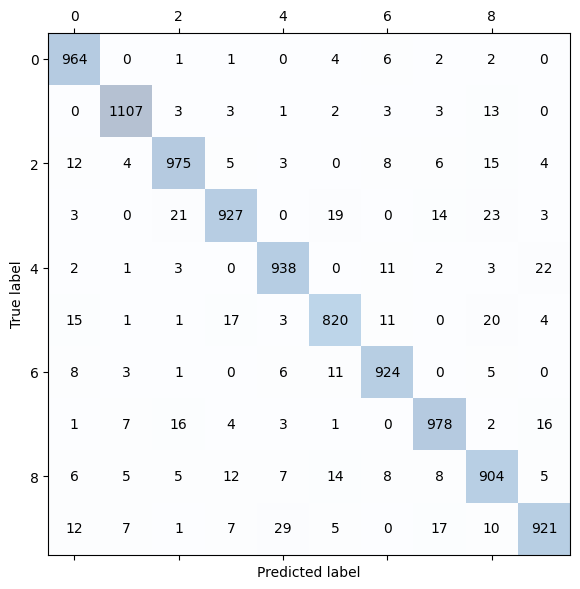

In [ ]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=predictions)

# draw confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/05_20.png', dpi=300)
plt.show()

In [ ]:
# 取得模型組態
# print("config = ", model.get_config())
# 取得模型所有權重
# print("weights = ", model.get_weights())
# # 取得模型彙總資訊
print("summary = ", model.summary())
# # 取得網路層資訊
# print("layer = ", model.get_layer(index=0).name)
# # 取得參數總數
print("params = ", model.count_params())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 dense_2 (Dense)             (None, 32)                1568      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 55,258
Trainable params: 55,258
Non-trainable params: 0
_________________________________________________________________
summary =  None
params =  55258


In [ ]:
dir(model)
for i in range(len(model.get_weights())) :
    print(i, model.get_weights()[i].shape)


0 (784, 64)
1 (64,)
2 (64, 48)
3 (48,)
4 (48, 32)
5 (32,)
6 (32, 10)
7 (10,)


In [ ]:
##################
# 驗證 model.save
##################
model.save('./model.h5')

In [ ]:
from keras.models import load_model
model2 = load_model('./model.h5')
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 dense_2 (Dense)             (None, 32)                1568      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 55,258
Trainable params: 55,258
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 顯示訓練成果(分數)
scores = model2.evaluate(x_Test_norm, y_TestOneHot)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  
scores = model2.evaluate(x_Train_norm, y_TrainOneHot)  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0)) 

313/313 [==============================] - 1s 3ms/step - loss: 0.1868 - accuracy: 0.9458
	[Info] Accuracy of testing data = 94.6%
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1740 - accuracy: 0.9506
	[Info] Accuracy of training data = 95.1%


(28, 28) 0.0 1.0


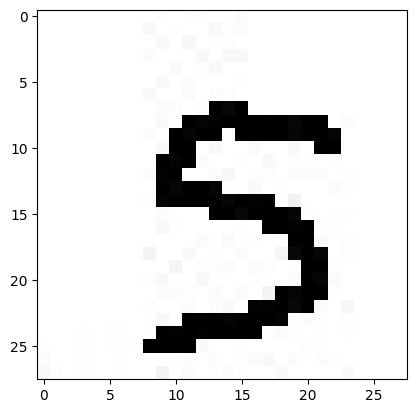

In [ ]:
# 如何載入圖片後使用訓練好的模型進行預測 5.jpg

# 載入圖片
import matplotlib.pyplot as plt
from skimage import color # rgb 2 gray 

sample = color.rgb2gray( plt.imread('5.jpg') )
print(sample.shape, sample.flatten().min(), sample.flatten().max())
plt.imshow(sample, cmap='gray_r')
plt.show()

In [ ]:
print(sample.reshape(1, 28 * 28).shape)
np.argmax(model2.predict(  sample.reshape(1, 28 * 28)   ), axis=1)

(1, 784)
1/1 [==============================] - 0s 66ms/step


array([5])